In [1]:
pip install tensorflow

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import openpyxl
import math
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn import *
import pyarrow
import seaborn as sns
import timeit

warnings.filterwarnings("ignore")


In [3]:
hw3_data = pd.read_excel('HW3.xlsx')

In [334]:
hw3_data.head().T

,0,1,2,3,4
sequence_number,1.00,2.0,3.00,4.0,5.0
US,1.00,1.0,1.00,1.0,1.0
source_a,0.00,0.0,0.00,0.0,0.0
source_c,0.00,0.0,0.00,1.0,1.0
source_b,1.00,0.0,0.00,0.0,0.0
source_d,0.00,0.0,0.00,0.0,0.0
source_e,0.00,1.0,0.00,0.0,0.0
source_m,0.00,0.0,0.00,0.0,0.0
source_o,0.00,0.0,0.00,0.0,0.0
source_h,0.00,0.0,0.00,0.0,0.0


In [335]:
hw3_data.dtypes

sequence_number           int64
US                        int64
source_a                  int64
source_c                  int64
source_b                  int64
source_d                  int64
source_e                  int64
source_m                  int64
source_o                  int64
source_h                  int64
source_r                  int64
source_s                  int64
source_t                  int64
source_u                  int64
source_p                  int64
source_x                  int64
source_w                  int64
Freq                      int64
last_update_days_ago      int64
1st_update_days_ago       int64
Web order                 int64
Gender=male               int64
Address_is_res            int64
Purchase                  int64
Spending                float64
dtype: object

In [336]:
hw3_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sequence_number,2000.0,1000.500000,577.494589,1.0,500.75,1000.500,1500.2500,2000.00
US,2000.0,0.824500,0.380489,0.0,1.00,1.000,1.0000,1.00
source_a,2000.0,0.126500,0.332495,0.0,0.00,0.000,0.0000,1.00
source_c,2000.0,0.056000,0.229979,0.0,0.00,0.000,0.0000,1.00
source_b,2000.0,0.060000,0.237546,0.0,0.00,0.000,0.0000,1.00
source_d,2000.0,0.041500,0.199493,0.0,0.00,0.000,0.0000,1.00
source_e,2000.0,0.151000,0.358138,0.0,0.00,0.000,0.0000,1.00
source_m,2000.0,0.016500,0.127420,0.0,0.00,0.000,0.0000,1.00
source_o,2000.0,0.033500,0.179983,0.0,0.00,0.000,0.0000,1.00
source_h,2000.0,0.052500,0.223089,0.0,0.00,0.000,0.0000,1.00


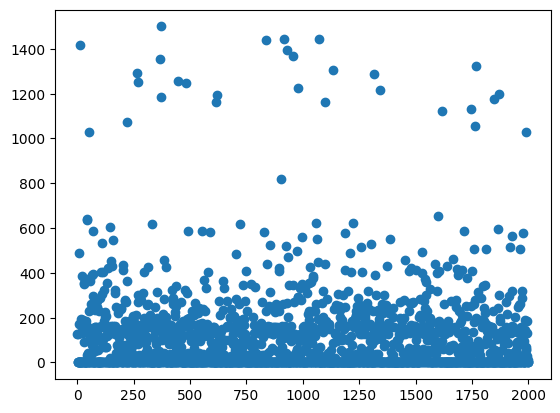

In [337]:
plt.scatter(hw3_data[['sequence_number']],hw3_data[['Spending']])

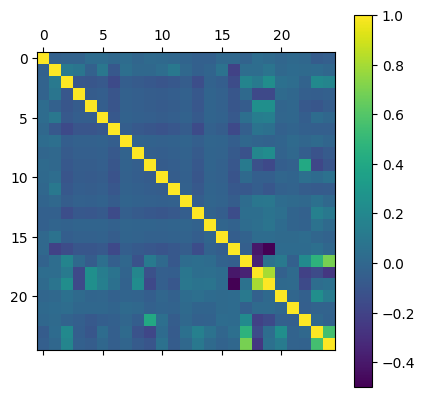

In [338]:
plt.matshow(hw3_data.corr())
plt.colorbar()

<AxesSubplot: >

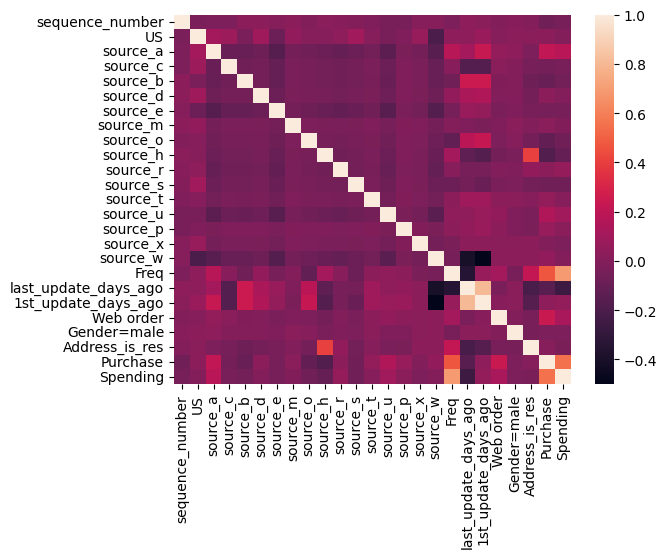

In [339]:
sns.heatmap(hw3_data.corr())

In [340]:
y = hw3_data['Spending']
x = hw3_data.loc[ : , ~hw3_data.columns.isin(['Purchase','Spending','sequence_number'])]

In [341]:
x.head().T

,0,1,2,3,4
US,1,1,1,1,1
source_a,0,0,0,0,0
source_c,0,0,0,1,1
source_b,1,0,0,0,0
source_d,0,0,0,0,0
source_e,0,1,0,0,0
source_m,0,0,0,0,0
source_o,0,0,0,0,0
source_h,0,0,0,0,0
source_r,0,0,0,0,0


In [342]:
y.head()

0    127.87
1      0.00
2    127.48
3      0.00
4      0.00
Name: Spending, dtype: float64

In [343]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.3, random_state=42)

In [344]:
#writing test train file to use 
X_train.to_parquet('X_train.parquet')
X_test.to_parquet('X_test.parquet')
pd.DataFrame(y_train).to_parquet('y_train.parquet')
pd.DataFrame(y_test).to_parquet('y_test.parquet')

In [4]:
X_train = pd.read_parquet('X_train.parquet')
X_test=pd.read_parquet('X_test.parquet')
y_train = pd.read_parquet('y_train.parquet')
y_test=pd.read_parquet('y_test.parquet')

In [5]:
y_train.describe()

,Spending
count,1400.000000
mean,101.745336
std,189.146415
min,0.000000
25%,0.000000
50%,0.130000
75%,149.317500
max,1500.060000


In [7]:
X_train.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.827857,0.122857,0.054286,0.065714,0.042857,0.162143,0.015714,0.032143,0.050000,0.070000,...,0.117143,0.006429,0.018571,0.130000,1.429286,2164.07500,2443.257857,0.398571,0.530000,0.219286
std,0.377639,0.328390,0.226662,0.247871,0.202607,0.368714,0.124412,0.176442,0.218023,0.255238,...,0.321705,0.079949,0.135054,0.336424,1.467055,1142.71873,1074.493341,0.489779,0.499278,0.413910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1134.75000,1708.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2310.50000,2735.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3158.25000,3353.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,15.000000,4188.00000,4188.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

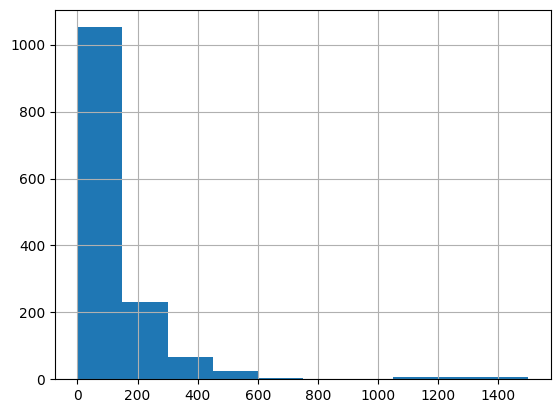

In [347]:
y_train['Spending'].hist()

# Question 1

## a)

### KNN

In [8]:
#Normalizing for KNN
scaler_X = preprocessing.MinMaxScaler()
scaler_X.fit(X_train)

x_train_norm = scaler_X.fit_transform(X_train)
x_test_norm= scaler_X.transform(X_test)


In [349]:
k_range = list(range(1,15))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)

knn = neighbors.KNeighborsRegressor(n_jobs=-1)
inner_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
clf = model_selection.GridSearchCV(knn, param_grid=param_grid, cv=inner_cv,scoring = 'neg_root_mean_squared_error')
clf.fit(x_train_norm, y_train)
non_nested_scores = clf.best_score_

# Nested CV with parameter optimization
nested_score = model_selection.cross_val_score(clf.best_estimator_, X=x_train_norm, 
                                               y=y_train, cv=outer_cv,scoring='neg_root_mean_squared_error')
nested_scores = nested_score.mean()

In [350]:
print (clf.best_params_)

{'n_neighbors': 7, 'weights': 'distance'}


In [351]:
nested_scores

-172.4471752874156

In [352]:
nested_score

array([-169.02551218, -163.28205755, -185.03395614])

In [353]:
clf_knn_best = clf.best_estimator_.fit(x_train_norm,y_train)

In [354]:
metrics.mean_absolute_error(y_train,clf_knn_best.predict(x_train_norm))

0.508245238095238

### Linear Regression

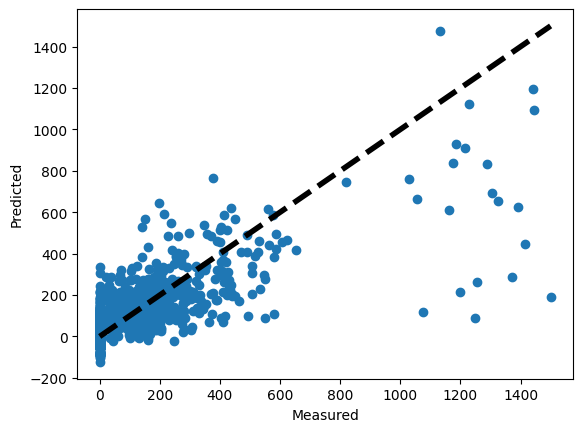

In [355]:
lr = linear_model.LinearRegression(n_jobs=-1,normalize=True)
# Nested CV with parameter optimization
predicted = model_selection.cross_val_predict(lr, X_train, y_train, cv=4)

fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Lasso Regression

In [356]:
alpha =np.linspace(0.01,0.5,1000)

In [357]:
# Cross-validated estimators
# The best model is selected by cross-validation.

## Build model
lasso = linear_model.LassoCV(eps=0.01,n_alphas = 100,alphas=alpha,n_jobs=-1,cv=3,normalize = True)
lasso.fit(X_train, y_train)

# The estimator chose automatically its lambda:
print(lasso.alpha_)

0.07033033033033033


In [358]:
metrics.mean_absolute_error(y_train,lasso.predict(X_train))

76.06655071654403

### Ridge Regression

In [359]:
ridge = linear_model.RidgeCV(alphas=alpha,normalize=True,cv = 3,scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
print(ridge.alpha_)

0.03158158158158158


In [360]:
metrics.mean_absolute_error(y_train,ridge.predict(X_train))

75.59968263031796

### Elastic Net

In [361]:
elastic_net = linear_model.ElasticNetCV(l1_ratio=0.99,eps=0.01,n_alphas = alpha,
                                        alphas=alpha,n_jobs=-1,cv=3,normalize = True)
elastic_net.fit(X_train, y_train)
print(elastic_net.alpha_)

0.01


In [362]:
metrics.mean_absolute_error(y_train,elastic_net.predict(X_train))

74.41541916282222

### Decision Tree

In [363]:
min_samples_split_range = list(range(1,15))
max_depth_range = list(range(1,10))


param_grid = dict(max_depth = max_depth_range, min_samples_split = min_samples_split_range)

#print (param_grid)
dtr = tree.DecisionTreeRegressor()
inner_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
rgr_dt = model_selection.GridSearchCV(dtr, param_grid=param_grid, cv=inner_cv,scoring = 'neg_root_mean_squared_error')
rgr_dt.fit(x_train_norm, y_train)
non_nested_scores = rgr_dt.best_score_

# Nested CV with parameter optimization
nested_score = model_selection.cross_val_score(rgr_dt, X=x_train_norm, y=y_train, cv=outer_cv,scoring = 'neg_root_mean_squared_error')
nested_scores = nested_score.mean()

In [364]:
print (rgr_dt.best_params_)

{'max_depth': 3, 'min_samples_split': 2}


In [365]:
nested_scores

-146.24109095811153

In [366]:
rgr_dt_best = rgr_dt.best_estimator_.fit(x_train_norm,y_train)

In [367]:
metrics.mean_absolute_error(y_train,rgr_dt_best.predict(x_train_norm))

75.69929602442627

### SVM

In [368]:
epsilon_range = np.linspace(0.01,5,20)
c_range = np.linspace(0.01,10,20)
kernel = ["linear", "poly","rbf"]

param_grid = dict(kernel = kernel, C = c_range,epsilon=epsilon_range)
svr = svm.SVR()
inner_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
rgr_svr = model_selection.GridSearchCV(svr, param_grid=param_grid, 
                                       cv=inner_cv,scoring = 'neg_root_mean_squared_error')
rgr_svr.fit(x_train_norm, y_train)
non_nested_scores = rgr_dt.best_score_

# Nested CV with parameter optimization
nested_score = model_selection.cross_val_score(rgr_svr, X=x_train_norm, y=y_train, 
                                               cv=outer_cv,scoring = 'neg_root_mean_squared_error')
nested_scores = nested_score.mean()

In [369]:
print (rgr_svr.best_params_)

{'C': 10.0, 'epsilon': 4.212105263157895, 'kernel': 'linear'}


In [370]:
nested_scores

-163.68423012048405

In [371]:
rgr_svr_best = rgr_svr.best_estimator_.fit(x_train_norm,y_train)

In [372]:
metrics.mean_absolute_error(y_train,rgr_svr_best.predict(x_train_norm))

75.76064021545614

### Neural Network

In [19]:
import tensorflow as tf 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

2022-11-04 13:34:15.849822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 13:34:16.059810: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-04 13:34:16.084426: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-04 13:34:16.610501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [20]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train_norm.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 167,809
Trainable params: 167,809
Non-trainable params: 0
_________________________________________________________________


2022-11-04 13:34:18.858162: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2022-11-04 13:34:18.858197: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: mdubuntu
2022-11-04 13:34:18.858202: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: mdubuntu
2022-11-04 13:34:18.858367: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 520.61.5
2022-11-04 13:34:18.858388: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.56.6
2022-11-04 13:34:18.858392: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 520.56.6 does not match DSO version 520.61.5 -- cannot find working devices in this configuration
2022-11-04 13:34:18.858766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow

In [21]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [22]:
NN_model.fit(x_train_norm, y_train.to_numpy(), epochs=500, 
             batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
25/35 [====================>.........] - ETA: 0s - loss: 40477.5117 - mean_squared_error: 40477.5117 
Epoch 1: val_loss improved from inf to 43479.43750, saving model to Weights-001--43479.43750.hdf5
35/35 [==============================] - 1s 7ms/step - loss: 40382.1172 - mean_squared_error: 40382.1172 - val_loss: 43479.4375 - val_mean_squared_error: 43479.4375
Epoch 2/500
32/35 [==========================>...] - ETA: 0s - loss: 32139.8105 - mean_squared_error: 32139.8105
Epoch 2: val_loss improved from 43479.43750 to 40531.50781, saving model to Weights-002--40531.50781.hdf5
35/35 [==============================] - 0s 3ms/step - loss: 31907.6777 - mean_squared_error: 31907.6777 - val_loss: 40531.5078 - val_mean_squared_error: 40531.5078
Epoch 3/500
 1/35 [..............................] - ETA: 0s - loss: 55325.4844 - mean_squared_error: 55325.4844
Epoch 3: val_loss improved from 40531.50781 to 38969.71875, saving model to Weights-003--38969.71875.hdf5
35/35 [=============

In [23]:
predictions = NN_model.predict(x_train_norm)

44/44 [==============================] - 0s 795us/step


In [24]:
metrics.mean_absolute_error(y_train,predictions)

32.4791009018651

### Ensemble RandomForestRegressor

In [12]:
n_estimators_range = list(range(100,101))
max_depth_range = list(range(1,10))
min_impurity_decrease_range = np.linspace(0.01,1,5)
criterion_values = ["squared_error", "absolute_error"]

param_grid = dict(n_estimators = n_estimators_range, max_depth = max_depth_range,
                  min_impurity_decrease = min_impurity_decrease_range,
                  criterion = criterion_values)
rf = ensemble.RandomForestRegressor(n_jobs=-1)
inner_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
rgr_rf = model_selection.GridSearchCV(rf, param_grid=param_grid, 
                                       cv=inner_cv,scoring = 'neg_root_mean_squared_error')
rgr_rf.fit(x_train_norm, y_train)
non_nested_scores = rgr_rf.best_score_

# Nested CV with parameter optimization
nested_score = model_selection.cross_val_score(rgr_rf, X=x_train_norm, y=y_train, 
                                               cv=outer_cv,scoring = 'neg_root_mean_squared_error')
nested_scores = nested_score.mean()

In [13]:
print (rgr_rf.best_params_)

{'criterion': 'squared_error', 'max_depth': 5, 'min_impurity_decrease': 0.2575, 'n_estimators': 100}


In [14]:
nested_scores

-131.3321441740347

In [15]:
rgr_rf_best = rgr_rf.best_estimator_.fit(x_train_norm,y_train)

In [16]:
metrics.mean_absolute_error(y_train,rgr_rf_best.predict(x_train_norm))

62.88265073969551

### Getting the best model based on the mean absolute error. It seems that neural network is giving the best score and knn is overfitting.
Using the test dataset to get the final metrics.

In [25]:
metrics.mean_absolute_error(y_test,NN_model.predict(x_test_norm))

19/19 [==============================] - 0s 954us/step


84.3217673800528

## b)

In [26]:
hw3_data_purchase = hw3_data[hw3_data['Purchase'] == 1]

In [27]:
hw3_data_purchase.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,963.5360,0.833000,0.197000,0.044000,0.036000,0.047000,0.134000,0.019000,0.013000,0.01200,...,0.017000,0.154000,2.077000,1975.010000,2475.384000,0.544000,0.514000,0.223000,1.0,205.090580
std,584.7072,0.373162,0.397931,0.205198,0.186383,0.211745,0.340823,0.136593,0.113331,0.10894,...,0.129336,0.361129,1.598633,1118.469756,1032.463509,0.498309,0.500054,0.416467,0.0,220.771639
min,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,3.190000
25%,436.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,1027.750000,1790.750000,0.000000,0.000000,0.000000,1.0,94.737500
50%,951.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,2.000000,1995.000000,2612.500000,1.000000,1.000000,0.000000,1.0,152.545000
75%,1485.2500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,2.250000,2912.000000,3270.000000,1.000000,1.000000,0.000000,1.0,234.087500
max,1997.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.0,1500.060000


In [28]:
y = hw3_data_purchase['Spending']
x = hw3_data_purchase.loc[ : , ~hw3_data_purchase.columns.isin(['Purchase','Spending','sequence_number'])]

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.3, random_state=42)

In [30]:
#writing test train file to use 
X_train.to_parquet('X_train_purchase.parquet')
X_test.to_parquet('X_test_purchase.parquet')
pd.DataFrame(y_train).to_parquet('y_train_purchase.parquet')
pd.DataFrame(y_test).to_parquet('y_test_purchase.parquet')

In [31]:
X_train = pd.read_parquet('X_train_purchase.parquet')
X_test=pd.read_parquet('X_test_purchase.parquet')
y_train = pd.read_parquet('y_train_purchase.parquet')
y_test=pd.read_parquet('y_test_purchase.parquet')

In [32]:
y_train.describe()

,Spending
count,700.000000
mean,200.039671
std,207.688794
min,3.190000
25%,97.532500
50%,152.545000
75%,229.550000
max,1446.000000


<AxesSubplot: >

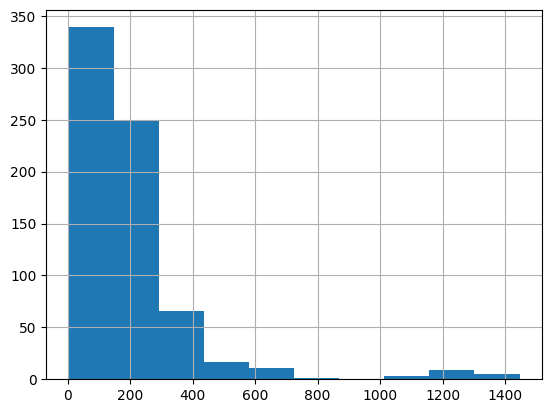

In [33]:
y_train['Spending'].hist()

In [34]:
#Normalizing for KNN
scaler_X = preprocessing.MinMaxScaler()
scaler_X.fit(X_train)

x_train_norm = scaler_X.fit_transform(X_train)
x_test_norm= scaler_X.transform(X_test)


In [35]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [36]:
k_range = list(range(1,15))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)

knn = neighbors.KNeighborsRegressor(n_jobs=-1)
inner_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
clf = model_selection.GridSearchCV(knn, param_grid=param_grid, cv=inner_cv,scoring = 'neg_root_mean_squared_error')
clf.fit(x_train_norm, y_train)
non_nested_scores = clf.best_score_

# Nested CV with parameter optimization
nested_score = model_selection.cross_val_score(clf.best_estimator_, X=x_train_norm, 
                                               y=y_train, cv=outer_cv,scoring='neg_root_mean_squared_error')
nested_scores = nested_score.mean()

In [37]:
print (clf.best_params_)

{'n_neighbors': 13, 'weights': 'distance'}


In [38]:
nested_scores

-193.36083638588352

In [39]:
nested_score

array([-173.78959776, -215.62425856, -190.66865284])

In [40]:
clf_knn_best = clf.best_estimator_.fit(x_train_norm,y_train)

In [41]:
metrics.mean_absolute_error(y_train,clf_knn_best.predict(x_train_norm))

0.5388142857142857

### Linear Regression

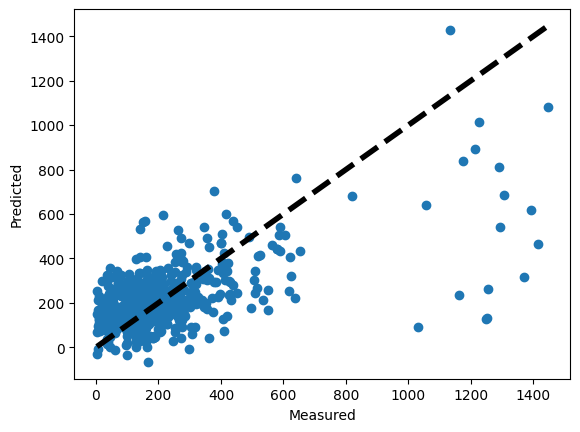

In [42]:
lr = linear_model.LinearRegression(n_jobs=-1,normalize=True)
# Nested CV with parameter optimization
predicted = model_selection.cross_val_predict(lr, X_train, y_train, cv=4)

fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Lasso Regression

In [43]:
alpha =np.linspace(0.01,0.5,1000)

In [44]:
# Cross-validated estimators
# The best model is selected by cross-validation.

## Build model
lasso = linear_model.LassoCV(eps=0.01,n_alphas = 100,alphas=alpha,n_jobs=-1,cv=3,normalize = True)
lasso.fit(X_train, y_train)

# The estimator chose automatically its lambda:
print(lasso.alpha_)

0.5


In [45]:
metrics.mean_absolute_error(y_train,lasso.predict(X_train))

98.1354181674344

### Ridge Regression

In [46]:
ridge = linear_model.RidgeCV(alphas=alpha,normalize=True,cv = 3,scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
print(ridge.alpha_)

0.11496496496496496


In [47]:
metrics.mean_absolute_error(y_train,ridge.predict(X_train))

96.17874646042827

### Elastic Net

In [48]:
elastic_net = linear_model.ElasticNetCV(l1_ratio=0.99,eps=0.01,n_alphas = alpha,
                                        alphas=alpha,n_jobs=-1,cv=3,normalize = True)
elastic_net.fit(X_train, y_train)
print(elastic_net.alpha_)

0.026186186186186185


In [49]:
metrics.mean_absolute_error(y_train,elastic_net.predict(X_train))

95.65413342719681

### Decision Tree

In [50]:
min_samples_split_range = list(range(1,15))
max_depth_range = list(range(1,10))


param_grid = dict(max_depth = max_depth_range, min_samples_split = min_samples_split_range)

#print (param_grid)
dtr = tree.DecisionTreeRegressor()
inner_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
rgr_dt = model_selection.GridSearchCV(dtr, param_grid=param_grid, cv=inner_cv,scoring = 'neg_root_mean_squared_error')
rgr_dt.fit(x_train_norm, y_train)
non_nested_scores = rgr_dt.best_score_

# Nested CV with parameter optimization
nested_score = model_selection.cross_val_score(rgr_dt, X=x_train_norm, y=y_train, cv=outer_cv,scoring = 'neg_root_mean_squared_error')
nested_scores = nested_score.mean()

In [51]:
print (rgr_dt.best_params_)

{'max_depth': 3, 'min_samples_split': 14}


In [52]:
nested_scores

-184.94413191818967

In [53]:
rgr_dt_best = rgr_dt.best_estimator_.fit(x_train_norm,y_train)

In [54]:
metrics.mean_absolute_error(y_train,rgr_dt_best.predict(x_train_norm))

92.73330238240561

### SVM

In [55]:
epsilon_range = np.linspace(0.01,5,20)
c_range = np.linspace(0.01,10,20)
kernel = ["linear", "poly","rbf"]

param_grid = dict(kernel = kernel, C = c_range,epsilon=epsilon_range)
svr = svm.SVR()
inner_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
rgr_svr = model_selection.GridSearchCV(svr, param_grid=param_grid, 
                                       cv=inner_cv,scoring = 'neg_root_mean_squared_error')
rgr_svr.fit(x_train_norm, y_train)
non_nested_scores = rgr_dt.best_score_

# Nested CV with parameter optimization
nested_score = model_selection.cross_val_score(rgr_svr, X=x_train_norm, y=y_train, 
                                               cv=outer_cv,scoring = 'neg_root_mean_squared_error')
nested_scores = nested_score.mean()

In [56]:
print (rgr_svr.best_params_)

{'C': 10.0, 'epsilon': 5.0, 'kernel': 'linear'}


In [57]:
nested_scores

-193.71571480779164

In [58]:
rgr_svr_best = rgr_svr.best_estimator_.fit(x_train_norm,y_train)

In [59]:
metrics.mean_absolute_error(y_train,rgr_svr_best.predict(x_train_norm))

98.25783054999542

### Neural Network

In [60]:
import tensorflow as tf 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [61]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train_norm.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               2944      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 167,809
Trainable params: 167,809
Non-trainable params: 0
_________________________________________________________________


In [62]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [63]:
NN_model.fit(x_train_norm, y_train.to_numpy(), epochs=500, 
             batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
 1/18 [>.............................] - ETA: 3s - loss: 83582.9688 - mean_squared_error: 83582.9688
Epoch 1: val_loss improved from inf to 101257.84375, saving model to Weights-001--101257.84375.hdf5
18/18 [==============================] - 0s 7ms/step - loss: 76866.1328 - mean_squared_error: 76866.1328 - val_loss: 101257.8438 - val_mean_squared_error: 101257.8438
Epoch 2/500
 1/18 [>.............................] - ETA: 0s - loss: 77398.2500 - mean_squared_error: 77398.2500
Epoch 2: val_loss improved from 101257.84375 to 61599.73438, saving model to Weights-002--61599.73438.hdf5
18/18 [==============================] - 0s 3ms/step - loss: 54932.2695 - mean_squared_error: 54932.2695 - val_loss: 61599.7344 - val_mean_squared_error: 61599.7344
Epoch 3/500
 1/18 [>.............................] - ETA: 0s - loss: 35132.1758 - mean_squared_error: 35132.1758
Epoch 3: val_loss improved from 61599.73438 to 58582.21094, saving model to Weights-003--58582.21094.hdf5
18/18 [=========

In [64]:
predictions = NN_model.predict(x_train_norm)

22/22 [==============================] - 0s 733us/step


In [65]:
metrics.mean_absolute_error(y_train,rgr_rf_best.predict(x_train_norm))

132.14002727706492

### Ensemble RandomForestRegressor

In [66]:
n_estimators_range = list(range(100,101))
max_depth_range = list(range(1,10))
min_impurity_decrease_range = np.linspace(0.01,1,5)
criterion_values = ["squared_error", "absolute_error"]

param_grid = dict(n_estimators = n_estimators_range, max_depth = max_depth_range,
                  min_impurity_decrease = min_impurity_decrease_range,
                 criterion = criterion_values)
rf = ensemble.RandomForestRegressor(n_jobs=-1)
inner_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
outer_cv = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)

# Non_nested parameter search and scoring
rgr_rf = model_selection.GridSearchCV(rf, param_grid=param_grid, 
                                       cv=inner_cv,scoring = 'neg_root_mean_squared_error')
rgr_rf.fit(x_train_norm, y_train)
non_nested_scores = rgr_rf.best_score_

# Nested CV with parameter optimization
nested_score = model_selection.cross_val_score(rgr_rf, X=x_train_norm, y=y_train, 
                                               cv=outer_cv,scoring = 'neg_root_mean_squared_error')
nested_scores = nested_score.mean()

In [67]:
print (rgr_rf.best_params_)

{'criterion': 'squared_error', 'max_depth': 3, 'min_impurity_decrease': 0.2575, 'n_estimators': 100}


In [68]:
nested_scores

-161.0489937975287

In [69]:
rgr_rf_best = rgr_rf.best_estimator_.fit(x_train_norm,y_train)

In [70]:
metrics.mean_absolute_error(y_train,rgr_rf_best.predict(x_train_norm))

86.83634901382143

### Getting the best model based on the mean absolute error. It seems that random forest is giving the best score and knn is overfitting.
Using the test dataset to get the final metrics.

In [71]:
metrics.mean_absolute_error(y_test,rgr_rf_best.predict(x_test_norm))

102.96211174346625

## c)